# **Library**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn import linear_model,metrics
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor

# **Exploratory Data Analysis**

In [25]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

/tmp/ipykernel_416391/435175621.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


,id,address_role,zip_code,deposit_balance,deposit_incoming,deposit_outgoing,average_loan_24_months,average_outstanding_balance_6_months,children,credit_history_3_years,...,employment_time,employment_industry,family_status,gender,housing_type,income_type,marital_status,max_outstanding_balance_12_months,total_debt,primary_income
0,0,NaN,Unspecified,NaN,NaN,NaN,NaN,780.0,NaN,NaN,...,NaN,NaN,NaN,F,NaN,Retired Pensioner,NaN,9200.0,0.0,30000.0
1,1,NaN,Unspecified,NaN,NaN,NaN,NaN,36017.0,NaN,NaN,...,NaN,NaN,NaN,F,NaN,Salaried Govt,NaN,104754.4,19067.0,59000.0
2,2,NaN,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,M,NaN,Retired Pensioner,NaN,NaN,18781.0,30000.0
3,3,NaN,Unspecified,NaN,NaN,NaN,NaN,8100.0,NaN,NaN,...,More than five years,Other,Married,F,NaN,Employed,NaN,51800.0,0.0,60000.0
4,4,NaN,Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,More than five years,Other,Married,F,NaN,Salaried Govt,NaN,NaN,0.0,40000.0


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300000 entries, 0 to 1299999
Data columns (total 23 columns):
 #   Column                                Non-Null Count    Dtype  
---  ------                                --------------    -----  
 0   id                                    1300000 non-null  int64  
 1   address_role                          10462 non-null    object 
 2   zip_code                              1221957 non-null  object 
 3   deposit_balance                       43512 non-null    float64
 4   deposit_incoming                      43512 non-null    float64
 5   deposit_outgoing                      43512 non-null    float64
 6   average_loan_24_months                138241 non-null   float64
 7   average_outstanding_balance_6_months  583462 non-null   float64
 8   children                              0 non-null        float64
 9   credit_history_3_years                31145 non-null    float64
 10  credit_history_1_year                 31145 non-null  

In [27]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226659 entries, 0 to 226658
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    226659 non-null  int64  
 1   address_role                          1801 non-null    object 
 2   zip_code                              213084 non-null  object 
 3   deposit_balance                       7597 non-null    float64
 4   deposit_incoming                      7597 non-null    float64
 5   deposit_outgoing                      7597 non-null    float64
 6   average_loan_24_months                24268 non-null   float64
 7   average_outstanding_balance_6_months  102016 non-null  float64
 8   children                              0 non-null       float64
 9   credit_history_3_years                5369 non-null    float64
 10  credit_history_1_year                 5369 non-null    float64
 11  

# **Feature Engineering**

In [28]:
col = ['id', 'average_loan_24_months', 'average_outstanding_balance_6_months', 'date_of_birth', 'education', 'employment_time', 'employment_industry', 'family_status', 'gender', 'income_type', 'max_outstanding_balance_12_months', 'total_debt', 'primary_income']
# clear_data['date_of_birth'] = pd.to_datetime(clear_data['date_of_birth'])
clear_data = train_data[col]
clear_data = clear_data.dropna()
clear_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33478 entries, 51 to 1299987
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    33478 non-null  int64  
 1   average_loan_24_months                33478 non-null  float64
 2   average_outstanding_balance_6_months  33478 non-null  float64
 3   date_of_birth                         33478 non-null  object 
 4   education                             33478 non-null  object 
 5   employment_time                       33478 non-null  object 
 6   employment_industry                   33478 non-null  object 
 7   family_status                         33478 non-null  object 
 8   gender                                33478 non-null  object 
 9   income_type                           33478 non-null  object 
 10  max_outstanding_balance_12_months     33478 non-null  float64
 11  total_debt       

In [29]:
# print(clear_data['date_of_birth'].value_counts(),end = "\n-------------------\n")
print(clear_data['employment_time'].value_counts(),end = "\n-------------------\n")
print(clear_data['education'].value_counts(),end = "\n-------------------\n")
print(clear_data['employment_industry'].value_counts(),end = "\n-------------------\n")
print(clear_data['family_status'].value_counts(),end = "\n-------------------\n")
print(clear_data['gender'].value_counts(),end = "\n-------------------\n")
print(clear_data['income_type'].value_counts(),end = "\n-------------------\n")

employment_time
More than five years    24349
More than one year       7691
Less than one year       1438
Name: count, dtype: int64
-------------------
education
Secondary / secondary special    19880
Higher education                 13037
Incomplete higher                  306
Lower secondary                    238
Academic degree                     17
Name: count, dtype: int64
-------------------
employment_industry
Other                24045
Government            2685
Education             2173
Trade                 1339
Health                 815
Manufacturing          657
Agriculture            316
Mining                 305
Transportation         276
Finance                218
Catering               213
Real Estate            202
Post Telco              57
Welness                 37
Lawyer                  35
Tourism                 28
Art Media               23
Insurance               14
It                      13
Gaming                  11
Recruitment              7
Marketing 

In [30]:
clear_data['date_of_birth'] = pd.to_datetime(clear_data['date_of_birth'])
cut_off_year = 2025
clear_data['age'] = cut_off_year - clear_data['date_of_birth'].dt.year
clear_data = clear_data
# clear_data
print(clear_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 33478 entries, 51 to 1299987
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   id                                    33478 non-null  int64         
 1   average_loan_24_months                33478 non-null  float64       
 2   average_outstanding_balance_6_months  33478 non-null  float64       
 3   date_of_birth                         33478 non-null  datetime64[ns]
 4   education                             33478 non-null  object        
 5   employment_time                       33478 non-null  object        
 6   employment_industry                   33478 non-null  object        
 7   family_status                         33478 non-null  object        
 8   gender                                33478 non-null  object        
 9   income_type                           33478 non-null  object        
 10  

In [31]:
clear_dummies = pd.get_dummies(clear_data[['employment_industry','family_status','gender','income_type']])
clear_dummies
# print(clear_dummies.info())

,employment_industry_Agriculture,employment_industry_Art Media,employment_industry_Catering,employment_industry_Charity Religious,employment_industry_Education,employment_industry_Finance,employment_industry_Gaming,employment_industry_Government,employment_industry_Health,employment_industry_Insurance,...,family_status_Single,family_status_Widowed,gender_F,gender_M,income_type_Employed,income_type_Handicapped 2,income_type_Private Sector Employee,income_type_Retired Pensioner,income_type_Salaried Govt,income_type_Selfemployed
51,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
84,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
89,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
129,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,False,False,False,False
135,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299860,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1299928,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1299959,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,True,False,False,False,False,False
1299967,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False


In [32]:
merge_data = clear_data.merge(clear_dummies,left_index=True,right_index=True,how = 'inner')
merge_data.shape

(33478, 50)

In [33]:
merge_data.drop(['employment_time','employment_industry','family_status','gender','income_type'], axis=1,inplace = True)
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33478 entries, 51 to 1299987
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   id                                     33478 non-null  int64         
 1   average_loan_24_months                 33478 non-null  float64       
 2   average_outstanding_balance_6_months   33478 non-null  float64       
 3   date_of_birth                          33478 non-null  datetime64[ns]
 4   education                              33478 non-null  object        
 5   max_outstanding_balance_12_months      33478 non-null  float64       
 6   total_debt                             33478 non-null  float64       
 7   primary_income                         33478 non-null  float64       
 8   age                                    33478 non-null  int32         
 9   employment_industry_Agriculture        33478 non-null  bool    

In [34]:
educate = {'Secondary / secondary special' : 1, 'Higher education' : 3, 'Lower secondary' : 0, 'Incomplete higher' : 2, 'Academic degree' : 4}
merge_data['education'] = merge_data['education'].replace(educate)
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33478 entries, 51 to 1299987
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   id                                     33478 non-null  int64         
 1   average_loan_24_months                 33478 non-null  float64       
 2   average_outstanding_balance_6_months   33478 non-null  float64       
 3   date_of_birth                          33478 non-null  datetime64[ns]
 4   education                              33478 non-null  int64         
 5   max_outstanding_balance_12_months      33478 non-null  float64       
 6   total_debt                             33478 non-null  float64       
 7   primary_income                         33478 non-null  float64       
 8   age                                    33478 non-null  int32         
 9   employment_industry_Agriculture        33478 non-null  bool    

/tmp/ipykernel_416391/3377057044.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merge_data['education'] = merge_data['education'].replace(educate)


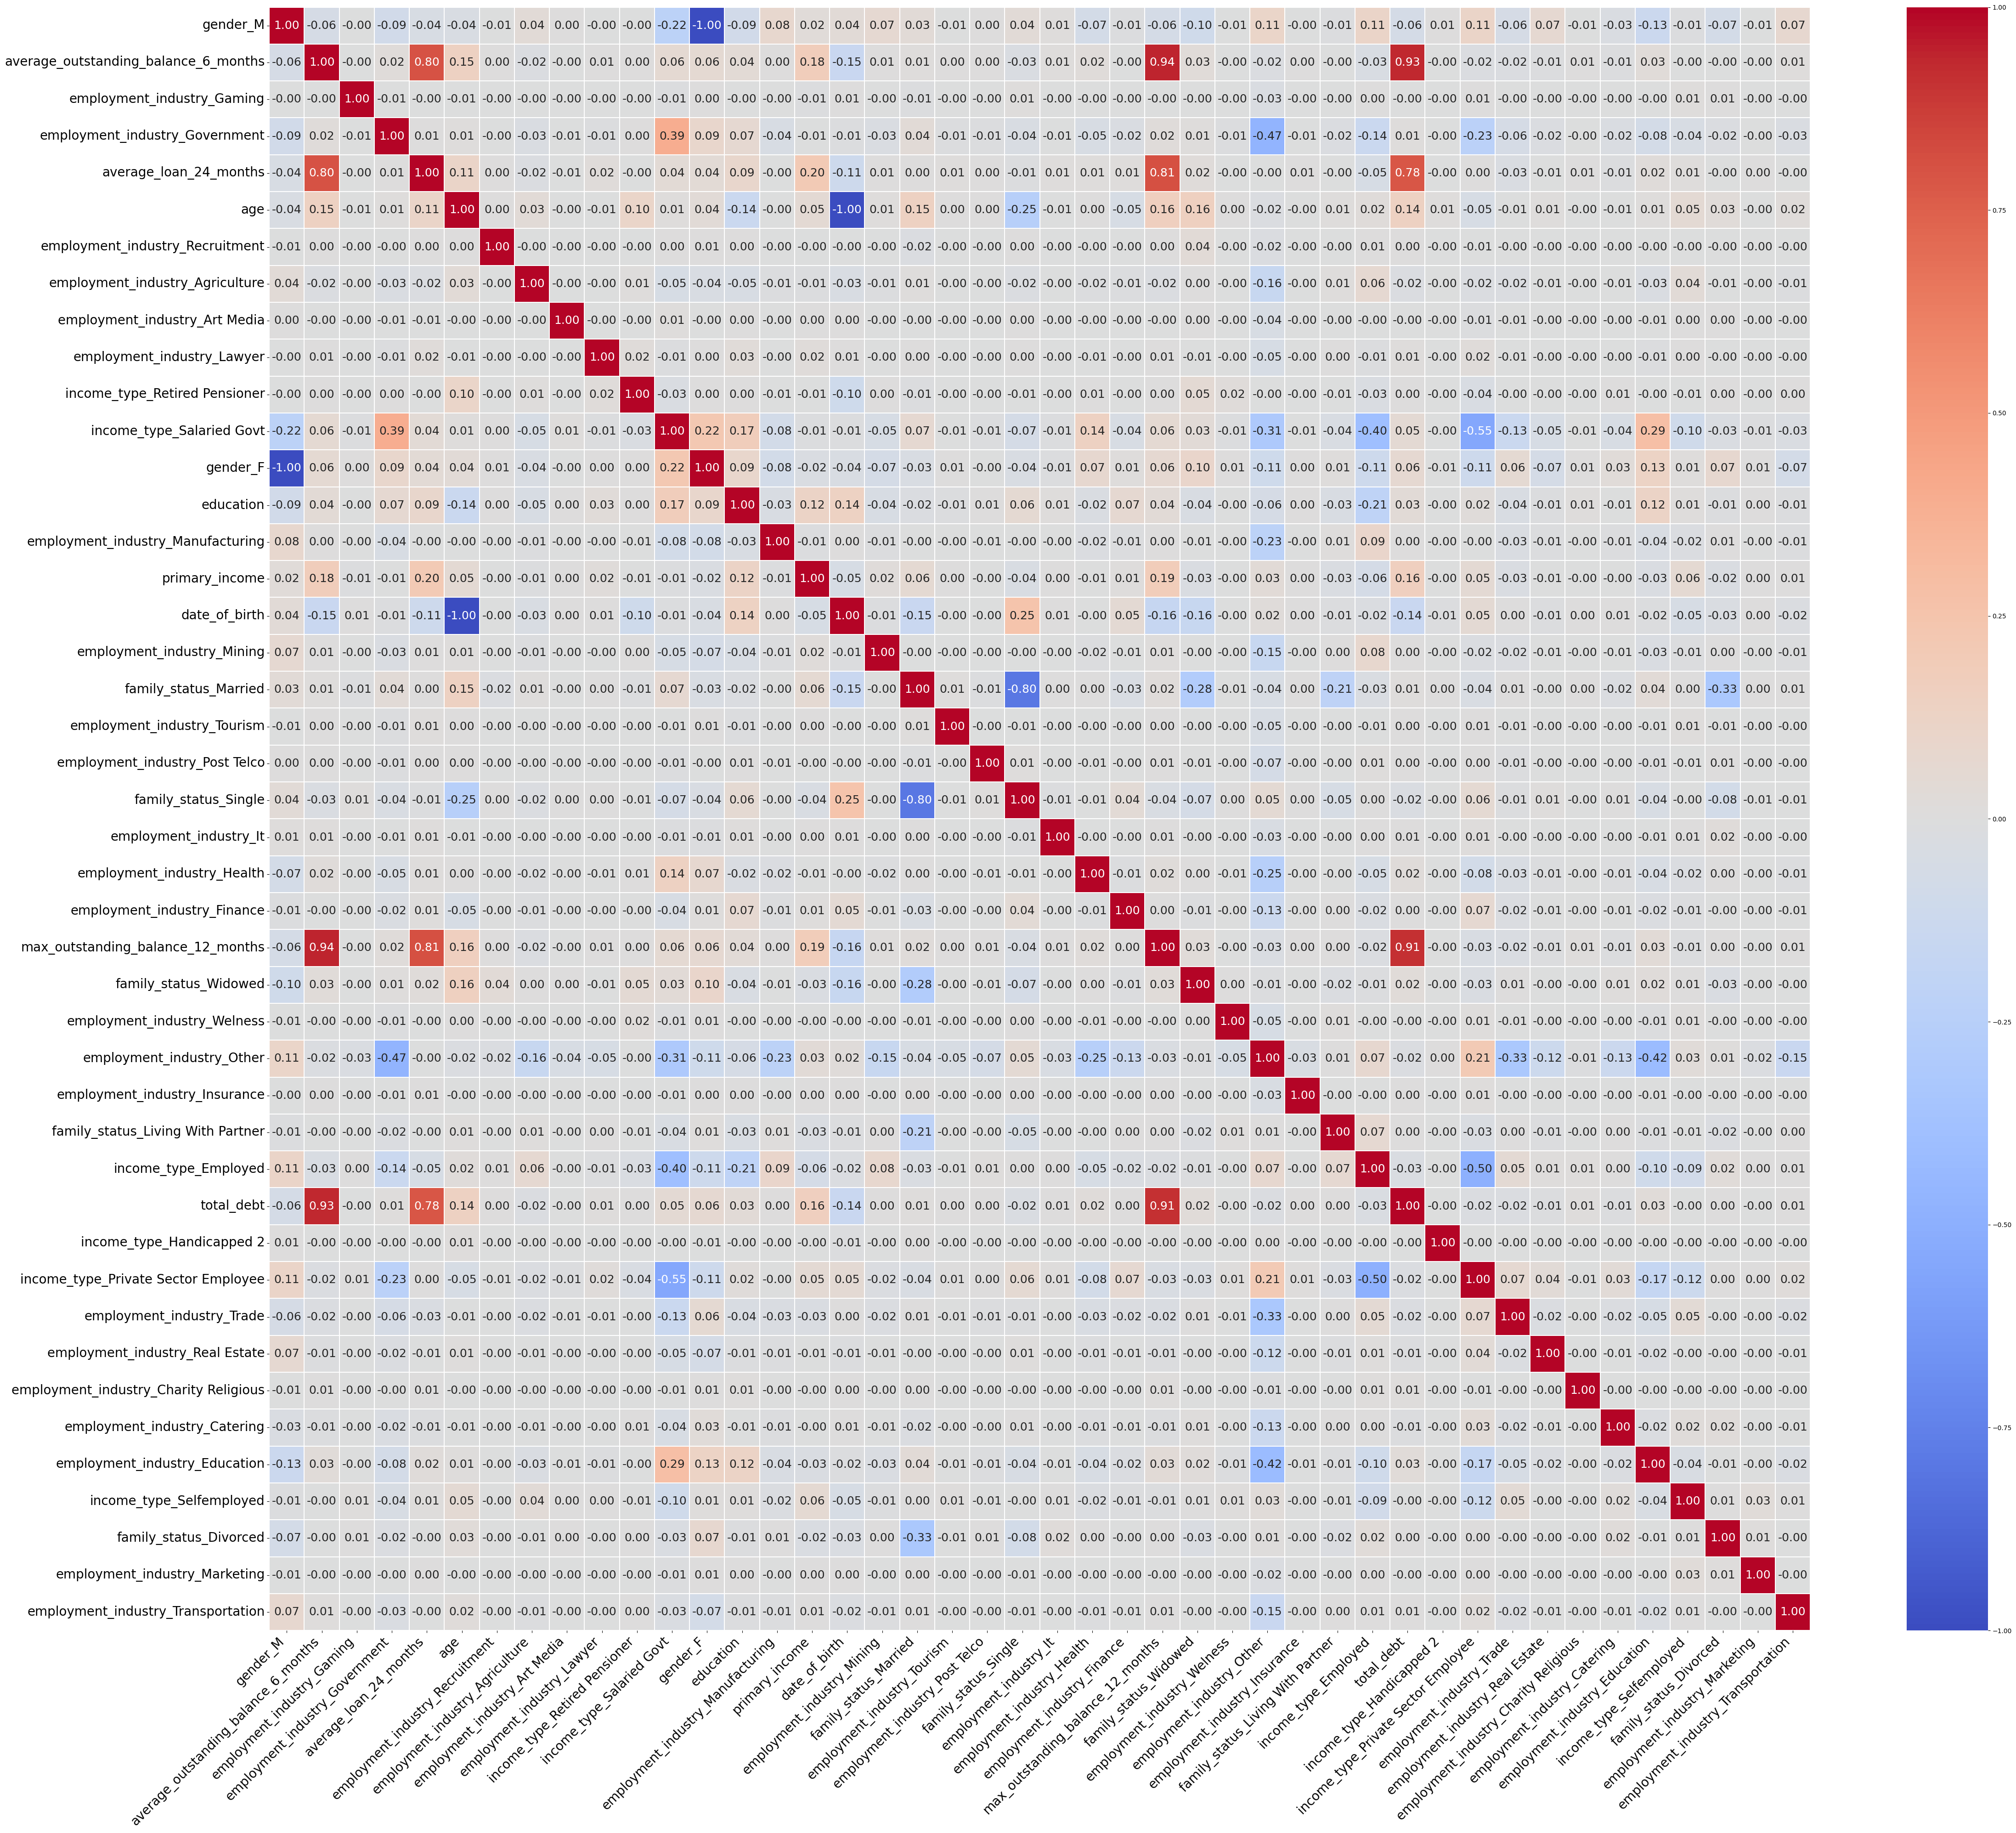

In [35]:
cols = list(set(merge_data.columns) - {'id'})
corr_matrix = merge_data[cols].corr()

plt.figure(figsize=(48, 40))

ax = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.1,
    annot_kws={'size': 18}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    fontsize=20
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    fontsize=20
)

plt.tight_layout()
plt.show()

In [36]:
important_col = ['average_loan_24_months','education','max_outstanding_balance_12_months','total_debt','average_outstanding_balance_6_months','age','income_type_Private Sector Employee','family_status_Married','income_type_Selfemployed','income_type_Employed']
X = merge_data[important_col]
y = merge_data['primary_income']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33478 entries, 51 to 1299987
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   average_loan_24_months                33478 non-null  float64
 1   education                             33478 non-null  int64  
 2   max_outstanding_balance_12_months     33478 non-null  float64
 3   total_debt                            33478 non-null  float64
 4   average_outstanding_balance_6_months  33478 non-null  float64
 5   age                                   33478 non-null  int32  
 6   income_type_Private Sector Employee   33478 non-null  bool   
 7   family_status_Married                 33478 non-null  bool   
 8   income_type_Selfemployed              33478 non-null  bool   
 9   income_type_Employed                  33478 non-null  bool   
dtypes: bool(4), float64(4), int32(1), int64(1)
memory usage: 1.8 MB


# **Manage test data**

In [37]:
test_data.fillna(0,inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226659 entries, 0 to 226658
Data columns (total 22 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   id                                    226659 non-null  int64  
 1   address_role                          226659 non-null  object 
 2   zip_code                              226659 non-null  object 
 3   deposit_balance                       226659 non-null  float64
 4   deposit_incoming                      226659 non-null  float64
 5   deposit_outgoing                      226659 non-null  float64
 6   average_loan_24_months                226659 non-null  float64
 7   average_outstanding_balance_6_months  226659 non-null  float64
 8   children                              226659 non-null  float64
 9   credit_history_3_years                226659 non-null  float64
 10  credit_history_1_year                 226659 non-null  float64
 11  

In [38]:
test_data['date_of_birth'] = pd.to_datetime(test_data['date_of_birth'])
cut_off_year = 2025
test_data['age'] = cut_off_year - test_data['date_of_birth'].dt.year
test_dummies = pd.get_dummies(test_data[['employment_industry','family_status','gender','income_type']])
test_data = test_data.merge(test_dummies,left_index=True,right_index=True,how = 'inner')
educate = {'Unspecified': 0,'Secondary / secondary special' : 1, 'Higher education' : 3, 'Lower secondary' : 0, 'Incomplete higher' : 2, 'Academic degree' : 4}
test_data['education'] = test_data['education'].replace(educate)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226659 entries, 0 to 226658
Data columns (total 64 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   id                                     226659 non-null  int64         
 1   address_role                           226659 non-null  object        
 2   zip_code                               226659 non-null  object        
 3   deposit_balance                        226659 non-null  float64       
 4   deposit_incoming                       226659 non-null  float64       
 5   deposit_outgoing                       226659 non-null  float64       
 6   average_loan_24_months                 226659 non-null  float64       
 7   average_outstanding_balance_6_months   226659 non-null  float64       
 8   children                               226659 non-null  float64       
 9   credit_history_3_years                 226659 no

/tmp/ipykernel_416391/1766534723.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['education'] = test_data['education'].replace(educate)


In [39]:
important_col = ['average_loan_24_months','education','max_outstanding_balance_12_months','total_debt','average_outstanding_balance_6_months','age','income_type_Private Sector Employee','family_status_Married','income_type_Selfemployed','income_type_Employed']
X_pred = test_data[important_col]
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226659 entries, 0 to 226658
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   average_loan_24_months                226659 non-null  float64
 1   education                             226659 non-null  int64  
 2   max_outstanding_balance_12_months     226659 non-null  float64
 3   total_debt                            226659 non-null  float64
 4   average_outstanding_balance_6_months  226659 non-null  float64
 5   age                                   226659 non-null  int32  
 6   income_type_Private Sector Employee   226659 non-null  bool   
 7   family_status_Married                 226659 non-null  bool   
 8   income_type_Selfemployed              226659 non-null  bool   
 9   income_type_Employed                  226659 non-null  bool   
dtypes: bool(4), float64(4), int32(1), int64(1)
memory usage: 10.4 MB


In [40]:
X_pred.head()

,average_loan_24_months,education,max_outstanding_balance_12_months,total_debt,average_outstanding_balance_6_months,age,income_type_Private Sector Employee,family_status_Married,income_type_Selfemployed,income_type_Employed
0,0.0,0,0.00,144547.800,0.000,71,False,False,False,False
1,0.0,3,138828.14,115545.740,123391.960,35,True,False,False,False
2,0.0,0,30966.60,15446.601,20909.459,34,False,False,False,True
3,0.0,1,0.00,0.000,0.000,34,False,False,False,True
4,0.0,0,328052.78,166707.000,196100.380,62,False,False,False,True


# **Model**

## Split Data

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Selection Model

In [42]:
linear_reg = linear_model.LinearRegression()
sgd = linear_model.SGDRegressor()
ransac = linear_model.RANSACRegressor()

In [43]:
for model in [linear_reg, sgd, ransac]:
  print('Avg. R2- ' + str(model) + ': ' + str(np.mean(cross_val_score(model, X, y, cv=5))))

Avg. R2- LinearRegression(): 0.0667055698362526
Avg. R2- SGDRegressor(): -7.81790164088558e+27
Avg. R2- RANSACRegressor(): -0.4453002338168018


## Linear

In [44]:
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
y_pred_train = linear_reg.predict(X_train)
y_pred_test = linear_reg.predict(X_test)

In [46]:
def regression_metrics(x, y, model):
  y_pred = model.predict(x)
  print('R2:', metrics.r2_score(y, y_pred))
  print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
  print('Mean Absolute Percentage Error:', np.sqrt(metrics.mean_absolute_percentage_error(y, y_pred)))
  print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

In [47]:
# หาความแม่นยำของ train dataset

regression_metrics(X_train, y_train, linear_reg)

R2: 0.0667812277713512
Mean Absolute Error: 25136.225649136304
Mean Absolute Percentage Error: 0.8371685499483316
Mean Squared Error: 1183375106.1257076
Root Mean Squared Error: 34400.219565079926


In [48]:
# หาความแม่นยำของ test dataset

regression_metrics(X_test, y_test, linear_reg)

R2: 0.07173012748513474
Mean Absolute Error: 24821.34965027781
Mean Absolute Percentage Error: 0.7262575001002698
Mean Squared Error: 1140526390.3158228
Root Mean Squared Error: 33771.6803004503


## SGDRegressor

In [49]:
sgd.fit(X_train, y_train)
print('Training metrics')
regression_metrics(X_train, y_train, sgd)
print('Testing metrics')
regression_metrics(X_test, y_test, sgd)

Training metrics
R2: -8.039655157107521e+27
Mean Absolute Error: 2.1495795162305905e+18
Mean Absolute Percentage Error: 6721927.449684237
Mean Squared Error: 1.0194745388624897e+37
Root Mean Squared Error: 3.1929211372385787e+18
Testing metrics
R2: -8.26567207167516e+27
Mean Absolute Error: 2.1239268433662533e+18
Mean Absolute Percentage Error: 6358474.747226825
Mean Squared Error: 1.0155685766146648e+37
Root Mean Squared Error: 3.18679867047585e+18


## RANSACR

In [50]:
ransac.fit(X_train, y_train)
print('Training metrics')
regression_metrics(X_train, y_train, ransac)
print('Testing metrics')
regression_metrics(X_test, y_test, ransac)

Training metrics
R2: -0.18223979355401188
Mean Absolute Error: 26810.698392690967
Mean Absolute Percentage Error: 0.7603310917853489
Mean Squared Error: 1499148091.3119
Root Mean Squared Error: 38718.83380619695
Testing metrics
R2: -0.16286459911224616
Mean Absolute Error: 26433.31629303641
Mean Absolute Percentage Error: 0.6675265581462976
Mean Squared Error: 1428763124.7348359
Root Mean Squared Error: 37798.98311773527


## Randomforest

In [51]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=5,
    cv=5,
    scoring='neg_mean_absolute_percentage_error',
    random_state=42
)

random_search.fit(X_train, y_train)
RForest = random_search.best_estimator_

In [52]:
print('Training metrics')
regression_metrics(X_train, y_train, RForest)
print('Testing metrics')
regression_metrics(X_test, y_test, RForest)

Training metrics
R2: 0.6125435777952334
Mean Absolute Error: 15657.099041630683
Mean Absolute Percentage Error: 0.6542940483252024
Mean Squared Error: 491317039.8948144
Root Mean Squared Error: 22165.672556789574
Testing metrics
R2: 0.03488247981268322
Mean Absolute Error: 25491.88502933651
Mean Absolute Percentage Error: 0.7358422861601108
Mean Squared Error: 1185799554.764901
Root Mean Squared Error: 34435.440388717274


# **Submission**

In [56]:
y_pred = ransac.predict(X_pred)
# y_pred = np.exp(y_pred)
y_pred

array([21370.77120498, 66205.75518641, 20154.61837022, ...,
       51801.13213816, 52101.58906908, 43718.55443256], shape=(226659,))

In [57]:
submission = pd.DataFrame({
    "id": test_data["id"],
    "primary_income": y_pred
})
submission

,id,primary_income
0,1300000,21370.771205
1,1300001,66205.755186
2,1300002,20154.618370
3,1300003,19709.936532
4,1300004,69427.549848
...,...,...
226654,1526654,44589.738099
226655,1526655,62275.020584
226656,1526656,51801.132138
226657,1526657,52101.589069


In [58]:
submission.to_csv('submission.csv', index=False)